# Perhitungan Skor RNN-IDS

## Import All Necessary Libraries

In [23]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import math

## Load All the Data

In [24]:
df_pred = pd.read_csv('/home/apta/neuralnetwork-AD/rnn-apta/results/vector/part_1_Treatment_training_21_run1/result-lstm-tcp21-hl2-seq2-do0.2-oov4000-part_3_Treatment_testing_21.csv', 
                      names=['id', 'binary_error', 'b_mean', 'b_iqr', 'b_zscore', 'floatin_error', 'f_mean', 'f_iqr', 'f_zscore'])

df_truth = pd.read_csv('/home/apta/neuralnetwork-AD/rnn-apta/texts_retraining/texts_retraining_21/part_3_ground_truth.csv', 
                       encoding='ISO-8859-1')


In [25]:
df_pred.head()

,id,binary_error,b_mean,b_iqr,b_zscore,floatin_error,f_mean,f_iqr,f_zscore
0,192.168.10.51-36947-192.168.10.50-21-tcp,0.379310,0,0,0,5268.094118,0,0,0
1,192.168.10.8-55605-192.168.10.50-21-tcp,0.367816,0,0,0,5585.058824,0,0,0
2,192.168.10.8-53052-192.168.10.50-21-tcp,0.356322,0,0,0,3928.435294,0,0,0
3,192.168.10.25-64086-192.168.10.50-21-tcp,0.390805,0,0,0,4530.647059,0,0,0
4,192.168.10.8-56350-192.168.10.50-21-tcp,0.402299,0,0,0,4330.858824,0,0,0


In [26]:
df_truth.head()

,ID,Label
0,192.168.10.51-36947-192.168.10.50-21-tcp,BENIGN
1,192.168.10.8-55605-192.168.10.50-21-tcp,BENIGN
2,192.168.10.8-53052-192.168.10.50-21-tcp,BENIGN
3,192.168.10.25-64086-192.168.10.50-21-tcp,BENIGN
4,192.168.10.8-56350-192.168.10.50-21-tcp,BENIGN


In [27]:
df_pred[['b_iqr']].value_counts()

b_iqr
0        626
1          6
Name: count, dtype: int64

## Exploratory Data Analysis

In [28]:
df_pred[['b_iqr']].value_counts()

b_iqr
0        626
1          6
Name: count, dtype: int64

In [29]:
df_pred[['b_zscore']].value_counts()

b_zscore
0           630
1             2
Name: count, dtype: int64

In [30]:
df_truth.isnull().sum()

ID       0
Label    0
dtype: int64

## Data Pre-Processing

### Convert the type of the data

In [31]:
df_truth['Label'].head()

0    BENIGN
1    BENIGN
2    BENIGN
3    BENIGN
4    BENIGN
Name: Label, dtype: object

## Making Predictions

In [32]:
df_pred["id"]

0      192.168.10.51-36947-192.168.10.50-21-tcp
1       192.168.10.8-55605-192.168.10.50-21-tcp
2       192.168.10.8-53052-192.168.10.50-21-tcp
3      192.168.10.25-64086-192.168.10.50-21-tcp
4       192.168.10.8-56350-192.168.10.50-21-tcp
                         ...                   
627    192.168.10.19-57260-192.168.10.50-21-tcp
628    192.168.10.51-52780-192.168.10.50-21-tcp
629    192.168.10.25-49277-192.168.10.50-21-tcp
630    192.168.10.16-48414-192.168.10.50-21-tcp
631       172.16.0.1-59212-192.168.10.50-21-tcp
Name: id, Length: 632, dtype: object

In [33]:
df_truth["ID"]

# df_truth[df_truth["id"] == "192.168.10.50-21-172.16.0.1-52120-tcp"]

0      192.168.10.51-36947-192.168.10.50-21-tcp
1       192.168.10.8-55605-192.168.10.50-21-tcp
2       192.168.10.8-53052-192.168.10.50-21-tcp
3      192.168.10.25-64086-192.168.10.50-21-tcp
4       192.168.10.8-56350-192.168.10.50-21-tcp
                         ...                   
627    192.168.10.19-57260-192.168.10.50-21-tcp
628    192.168.10.51-52780-192.168.10.50-21-tcp
629    192.168.10.25-49277-192.168.10.50-21-tcp
630    192.168.10.16-48414-192.168.10.50-21-tcp
631       172.16.0.1-59212-192.168.10.50-21-tcp
Name: ID, Length: 632, dtype: object

In [34]:
# Convert 'Label' column to numeric: BENIGN -> 0, other -> 1
df_truth['Label'] = df_truth['Label'].apply(lambda x: 0 if x == 'BENIGN' else 1)

In [35]:
# df_pred["Label"] = np.where(df_pred["id"].isin(df_truth["id"]), 1, 0)

# Rename 'ID' to 'id' in df_truth
df_truth = df_truth.rename(columns={'ID': 'id'})

# Now merge and drop rows where the label is missing
df_pred = df_pred.merge(df_truth[['id', 'Label']], on='id', how='left')
df_pred = df_pred.dropna(subset=['Label'])


In [36]:
df_pred[df_pred['Label']==1]

,id,binary_error,b_mean,b_iqr,b_zscore,floatin_error,f_mean,f_iqr,f_zscore,Label
80,172.16.0.1-57292-192.168.10.50-21-tcp,0.421053,0,0,0,25860.611111,0,0,1,1
81,172.16.0.1-56326-192.168.10.50-21-tcp,0.500000,1,0,0,92138.522727,1,1,1,1
82,172.16.0.1-60054-192.168.10.50-21-tcp,0.322581,0,0,0,11758.206897,0,0,0,1
83,172.16.0.1-56314-192.168.10.50-21-tcp,0.303030,0,0,0,12617.774194,0,0,0,1
84,172.16.0.1-58020-192.168.10.50-21-tcp,0.343750,0,0,0,4144.666667,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
572,172.16.0.1-57956-192.168.10.50-21-tcp,0.444444,0,0,0,6187.970588,0,0,0,1
573,172.16.0.1-59544-192.168.10.50-21-tcp,0.212121,0,0,0,3709.709677,0,0,0,1
574,172.16.0.1-52650-192.168.10.50-21-tcp,0.371429,0,0,0,17685.606061,0,0,0,1
575,172.16.0.1-56670-192.168.10.50-21-tcp,0.333333,0,0,0,2521.582090,0,0,0,1


In [37]:
df_pred[df_pred['Label']==0]

,id,binary_error,b_mean,b_iqr,b_zscore,floatin_error,f_mean,f_iqr,f_zscore,Label
0,192.168.10.51-36947-192.168.10.50-21-tcp,0.379310,0,0,0,5268.094118,0,0,0,0
1,192.168.10.8-55605-192.168.10.50-21-tcp,0.367816,0,0,0,5585.058824,0,0,0,0
2,192.168.10.8-53052-192.168.10.50-21-tcp,0.356322,0,0,0,3928.435294,0,0,0,0
3,192.168.10.25-64086-192.168.10.50-21-tcp,0.390805,0,0,0,4530.647059,0,0,0,0
4,192.168.10.8-56350-192.168.10.50-21-tcp,0.402299,0,0,0,4330.858824,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
632,192.168.10.19-57260-192.168.10.50-21-tcp,0.367816,0,0,0,4021.541176,0,0,0,0
633,192.168.10.51-52780-192.168.10.50-21-tcp,0.379310,0,0,0,4955.658824,0,0,0,0
634,192.168.10.25-49277-192.168.10.50-21-tcp,0.379310,0,0,0,3348.917647,0,0,0,0
635,192.168.10.16-48414-192.168.10.50-21-tcp,0.390805,0,0,0,4768.588235,0,0,0,0


In [38]:
df_pred

,id,binary_error,b_mean,b_iqr,b_zscore,floatin_error,f_mean,f_iqr,f_zscore,Label
0,192.168.10.51-36947-192.168.10.50-21-tcp,0.379310,0,0,0,5268.094118,0,0,0,0
1,192.168.10.8-55605-192.168.10.50-21-tcp,0.367816,0,0,0,5585.058824,0,0,0,0
2,192.168.10.8-53052-192.168.10.50-21-tcp,0.356322,0,0,0,3928.435294,0,0,0,0
3,192.168.10.25-64086-192.168.10.50-21-tcp,0.390805,0,0,0,4530.647059,0,0,0,0
4,192.168.10.8-56350-192.168.10.50-21-tcp,0.402299,0,0,0,4330.858824,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
633,192.168.10.51-52780-192.168.10.50-21-tcp,0.379310,0,0,0,4955.658824,0,0,0,0
634,192.168.10.25-49277-192.168.10.50-21-tcp,0.379310,0,0,0,3348.917647,0,0,0,0
635,192.168.10.16-48414-192.168.10.50-21-tcp,0.390805,0,0,0,4768.588235,0,0,0,0
636,192.168.10.16-48414-192.168.10.50-21-tcp,0.390805,0,0,0,4768.588235,0,0,0,0


In [39]:
df_pred[['Label']].value_counts()

Label
1        497
0        141
Name: count, dtype: int64

In [40]:
import os
# Define the directory path
dir_path = '../mcnemar/ftp'

# Check if the directory exists, and if not, create it
if not os.path.exists(dir_path):
    os.makedirs(dir_path)

df_temp = df_pred[['id', 'b_mean','b_iqr', 'b_zscore', 'f_zscore', 'f_mean','f_iqr' ]]
df_temp.to_csv(os.path.join(dir_path, 'pred_0.0.csv'))

## Calculating Score

In [41]:
threshold = ['b_mean', 'b_iqr', 'b_zscore']
threshold_2 = ['f_mean', 'f_iqr', 'f_zscore']

methods = ['binary', 'floating']

In [42]:
df_pred[['b_zscore']]

,b_zscore
0,0
1,0
2,0
3,0
4,0
...,...
633,0
634,0
635,0
636,0


### Detection Rate

In [43]:
from sklearn.metrics import recall_score

score = dict()
score['Detection Rate'] = dict()
for method in methods:
    if method == 'binary':
        for i in threshold:
            acc = recall_score(df_pred['Label'], df_pred[i])
            score['Detection Rate'][i] = acc
            print(f'Recall-Binary-{i}: {acc}')
    else:
        for i in threshold_2:
            acc = recall_score(df_pred['Label'], df_pred[i])
            score['Detection Rate'][i] = acc
            print(f'Recall-Floating-{i}: {acc}')  

Recall-Binary-b_mean: 0.0482897384305835
Recall-Binary-b_iqr: 0.012072434607645875
Recall-Binary-b_zscore: 0.004024144869215292
Recall-Floating-f_mean: 0.03822937625754527
Recall-Floating-f_iqr: 0.11066398390342053
Recall-Floating-f_zscore: 0.3722334004024145


### Confussion Matrix

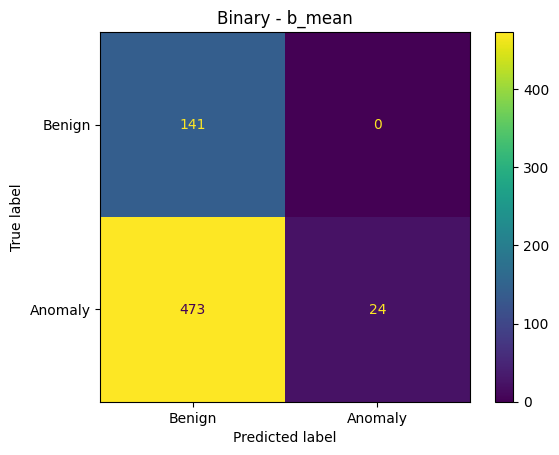

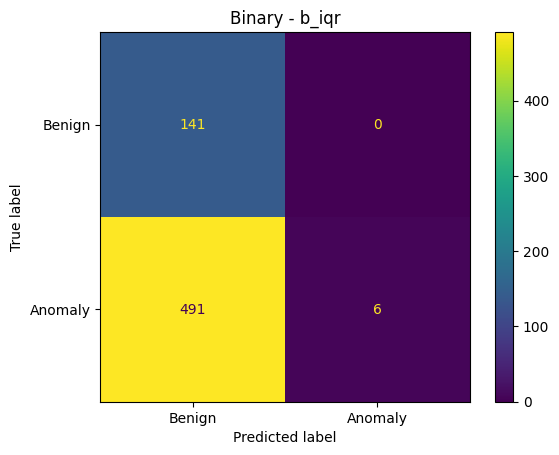

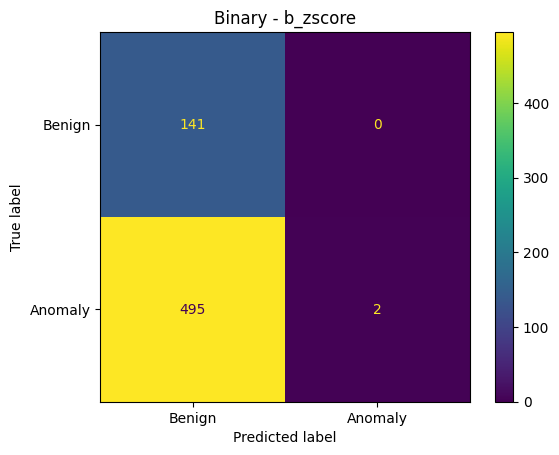

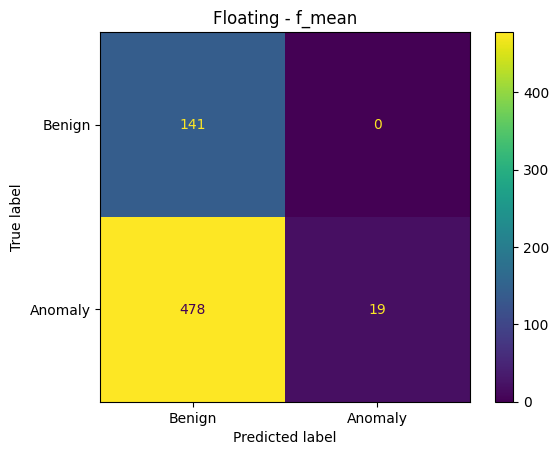

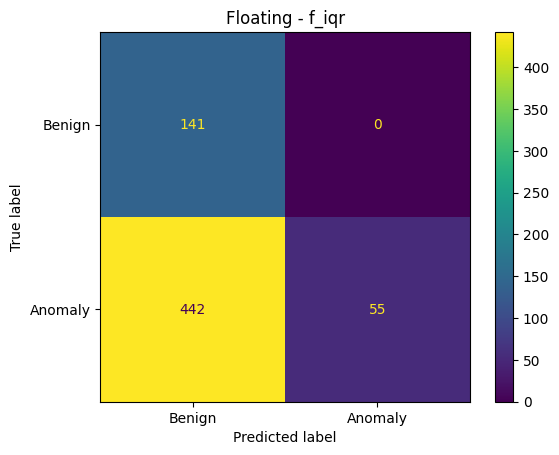

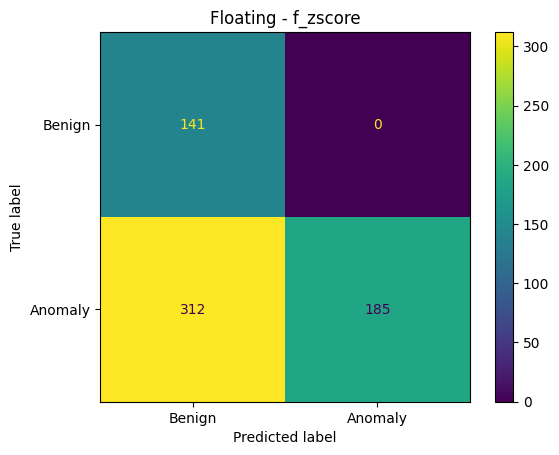

In [44]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

for method in methods:
    if method == 'binary':
        for i in threshold:
            conf_matrix = confusion_matrix(df_pred['Label'], df_pred[i])
            cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels=['Benign', 'Anomaly'])
            cm_display.plot()
            plt.title(f'Binary - {i.strip()}')
            plt.show()
    else:
        for i in threshold_2:
            conf_matrix = confusion_matrix(df_pred['Label'], df_pred[i])
            cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels=['Benign', 'Anomaly'])
            cm_display.plot()
            plt.title(f'Floating - {i.strip()}')
            plt.show()


### F2-Score

In [45]:
score['F2 Score'] = dict()
for method in methods:
    if method == 'binary':
        for i in threshold:
            tn, fp, fn, tp = confusion_matrix(df_pred['Label'], df_pred[i]).ravel()
            f2 = ((1+2**2)*tp)/((1+2**2)*tp+2**2*fn+fp)
            score['F2 Score'][i] = f2
            print(f'F2-Binary-{i}: {f2}')
    else:
        for i in threshold_2:
            tn, fp, fn, tp = confusion_matrix(df_pred['Label'], df_pred[i]).ravel()
            f2 = ((1+2**2)*tp)/((1+2**2)*tp+2**2*fn+fp)
            score['F2 Score'][i] = f2
            print(f'F2-Floating-{i}: {f2}')

F2-Binary-b_mean: 0.05964214711729622
F2-Binary-b_iqr: 0.015045135406218655
F2-Binary-b_zscore: 0.005025125628140704
F2-Floating-f_mean: 0.04733432984554061
F2-Floating-f_iqr: 0.1346059716103769
F2-Floating-f_zscore: 0.42567878508973767


### FPR Score

In [46]:
score['FPR Score'] = dict()
for method in methods:
    if method == 'binary':
        for i in threshold:
            tn, fp, fn, tp = confusion_matrix(df_pred['Label'], df_pred[i]).ravel()
            fpr = fp/(fp+tn)
            score['FPR Score'][i] = fpr
            print(f'FPR-Binary-{i}: {fpr}')
    else:
        for i in threshold_2:
            tn, fp, fn, tp = confusion_matrix(df_pred['Label'], df_pred[i]).ravel()
            fpr = fp/(fp+tn)
            score['FPR Score'][i] = fpr
            print(f'FPR-Floating-{i}: {fpr}')

FPR-Binary-b_mean: 0.0
FPR-Binary-b_iqr: 0.0
FPR-Binary-b_zscore: 0.0
FPR-Floating-f_mean: 0.0
FPR-Floating-f_iqr: 0.0
FPR-Floating-f_zscore: 0.0


In [47]:
from sklearn.metrics import accuracy_score

score['Accuracy Score'] = dict()
for method in methods:
    if method == 'binary':
        for i in threshold:
            acc = accuracy_score(df_pred['Label'], df_pred[i])
            score['Accuracy Score'][i] = acc
            print(f'Accuracy-Binary-{i}: {acc}')
    else:
        for i in threshold_2:
            acc = accuracy_score(df_pred['Label'], df_pred[i])
            score['Accuracy Score'][i] = acc
            print(f'Accuracy-Floating-{i}: {acc}')  

Accuracy-Binary-b_mean: 0.25862068965517243
Accuracy-Binary-b_iqr: 0.2304075235109718
Accuracy-Binary-b_zscore: 0.22413793103448276
Accuracy-Floating-f_mean: 0.2507836990595611
Accuracy-Floating-f_iqr: 0.3072100313479624
Accuracy-Floating-f_zscore: 0.5109717868338558


In [48]:
df_score = pd.DataFrame.from_dict(score)
df_score

,Detection Rate,F2 Score,FPR Score,Accuracy Score
b_mean,0.048290,0.059642,0.0,0.258621
b_iqr,0.012072,0.015045,0.0,0.230408
b_zscore,0.004024,0.005025,0.0,0.224138
f_mean,0.038229,0.047334,0.0,0.250784
f_iqr,0.110664,0.134606,0.0,0.307210
f_zscore,0.372233,0.425679,0.0,0.510972


In [49]:
df_score.to_excel('score_ftp_0.0.xlsx')

In [50]:
# %pip install openpyxl